## Get Price History from Blockchain

In [1]:
from web3 import Web3
import pandas as pd
import os, sys, json
from matplotlib import pyplot as plt
import numpy as np
from dotenv import load_dotenv
load_dotenv('../.env')

# Scripts
scripts_module_path = os.path.abspath(os.path.join(os.getcwd(),'..', 'scripts'))
if scripts_module_path not in sys.path:
    sys.path.append(scripts_module_path)
from acquisition import Acquisition as Akw
w3 = Web3(Web3.HTTPProvider(os.getenv("ALECHEMY_MAINNET_ENDPOINT")))
# w3 = Web3(Web3.IPCProvider('/home/leonhard/.ethereum/geth.ipc'))
print("JSON RPC for Alchemy is connected: ", w3.isConnected())

JSON RPC for Alchemy is connected:  True


### MIM USDC Uniswap Pool

In [6]:
MIM_USDC_UniPool_contract = "UniswapV3MimUsdc"
filepath = f'../data/contracts/{MIM_USDC_UniPool_contract}.json'
with open(filepath, 'r') as fl:
    interace = json.load(fl)
    ABI = json.dumps(interace["interface"])
    address = list(interace["addresses"].values())[0]
mim_usdc_pool_contract = w3.eth.contract(address=address, abi=ABI)
# contr_mim = mim_usdc_pool_contract.caller()

In [108]:
all_events = mim_usdc_pool_contract.events._events
[e["name"] for e in all_events]

In [15]:
# randomBlock = 10939454
# myfilter = mim_usdc_pool_contract.events.Swap.createFilter(fromBlock=randomBlock, toBlock='latest')
# events = myfilter.get_all_entries()

In [100]:
# bnbs = [e["blockNumber"] for e in events]
# mims = [abs(e["args"]["amount0"] * 10 ** (-18)) for e in events]
# usdc = [abs(e["args"]["amount1"] * 10 ** (-6)) for e in events]
# dirc = [np.sign(e["args"]["amount1"]) for e in events]
# uni_mim_usdc_df = pd.DataFrame(data=dict(
#     blocknumber=bnbs,
#     MIM=mims,
#     USDC=usdc,
#     direction=dirc
# ))
# uni_mim_usdc_df["MIM_to_USDC"] = uni_mim_usdc_df["MIM"] / uni_mim_usdc_df["USDC"]
# uni_mim_usdc_df.to_csv('../data/blockscanner/Uniswap_MIM_to_USDC.csv', sep=',')
uni_mim_usdc_df = pd.read_csv('../data/blockscanner/Uniswap_MIM_to_USDC.csv', sep=',', index_col=0)

In [102]:
swap_mim = uni_mim_usdc_df[uni_mim_usdc_df.direction==1]
swap_usdc = uni_mim_usdc_df[uni_mim_usdc_df.direction==-1]
minbn = uni_mim_usdc_df.blocknumber.min()
maxbn = uni_mim_usdc_df.blocknumber.max()
delbn = maxbn - minbn

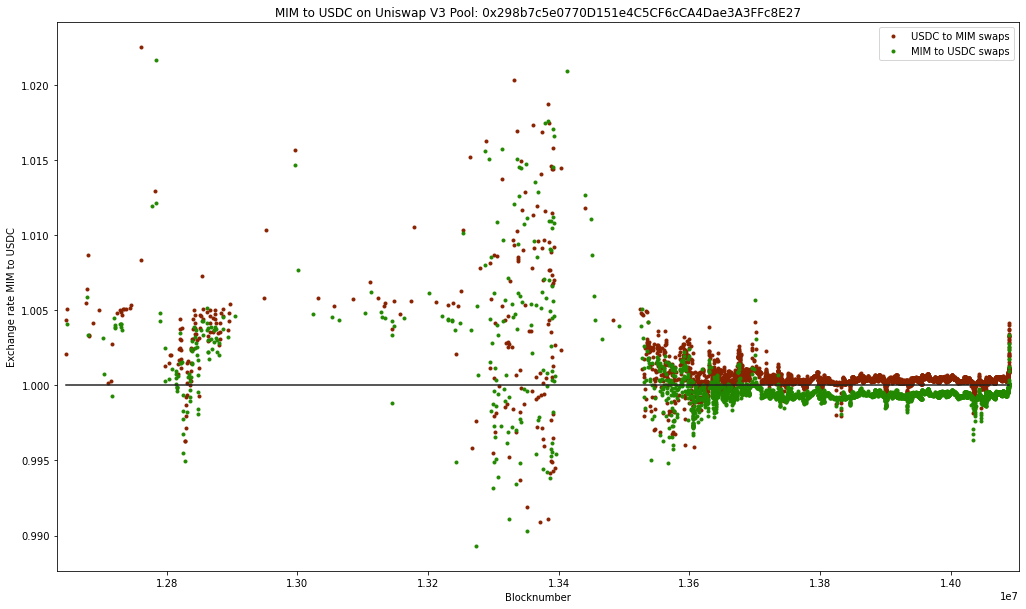

In [107]:
# plt.plot(uni_mim_usdc_df.blocknumber, uni_mim_usdc_df.MIM_to_USDC)
plt.plot(swap_usdc.blocknumber, swap_usdc.MIM_to_USDC, color='#820', marker='.', linestyle='')
plt.plot(swap_mim.blocknumber, swap_mim.MIM_to_USDC, color='#280', marker='.', linestyle='')
plt.plot([minbn, maxbn], [1,1], linestyle='-', color="#222")
ax = plt.gca()
ax.set(title="MIM to USDC on Uniswap V3 Pool: " + address,
       xlabel="Blocknumber",
       ylabel="Exchange rate MIM to USDC")
ax.set_xlim([minbn - (1/100)*(delbn), maxbn + (1/100)*(delbn)])
fg = plt.gcf()
fg.tight_layout()
fg.set_size_inches(16,10)
ax.legend(labels=["USDC to MIM swaps", "MIM to USDC swaps"])
plt.savefig('../img/MIM_to_USDC_Uniswap.png', format='png')
plt.show()

## Curve3 Pool with MIM

In [16]:
Curve3PoolMim_address = '0xa79828df1850e8a3a3064576f380d90aecdd3359'
result = Akw.requestInterface(address=Curve3PoolMim_address)

### MIM to UST Cauldron

In [113]:
MIM_UST_Cauldron_address = '0x59E9082E068Ddb27FC5eF1690F9a9f22B32e573f'

In [114]:
MIM_USDC_UniPool_contract = "CauldronWethV2"
filepath = f'../data/contracts/{MIM_USDC_UniPool_contract}.json'
with open(filepath, 'r') as fl:
    interace = json.load(fl)
    ABI = json.dumps(interace["interface"])
mim_ust_cauldron_contract = w3.eth.contract(address=MIM_UST_Cauldron_address, abi=ABI)
# contr_mim = mim_usdc_pool_contract.caller()

In [116]:
[e["name"] for e in mim_ust_cauldron_contract.events._events]

['LogAccrue',
 'LogAddCollateral',
 'LogBorrow',
 'LogExchangeRate',
 'LogFeeTo',
 'LogRemoveCollateral',
 'LogRepay',
 'LogWithdrawFees',
 'OwnershipTransferred']

In [117]:
randomBlock = 10939454
myfilter = mim_ust_cauldron_contract.events.LogExchangeRate.createFilter(fromBlock=randomBlock, toBlock='latest')
events_exRate = myfilter.get_all_entries()

In [124]:
# bnbs = [e["blockNumber"] for e in events_exRate]
# xrate = [events_exRate[0]["args"]["rate"] * 10 ** (-18) for e in events_exRate]
# mim_usdc_cauldron_df = pd.DataFrame(data=dict(
#     blocknumber=bnbs,
#     exchangerate=xrate
# ))
# mim_usdc_cauldron_df.to_csv('../data/blockscanner/CauldronV2_MIM_to_USDC.csv', sep=',')
mim_usdc_cauldron_df = pd.read_csv('../data/blockscanner/CauldronV2_MIM_to_USDC.csv', sep=',', index_col=0)

In [ ]:
minbn = mim_usdc_cauldron_df.blocknumber.min()
maxbn = mim_usdc_cauldron_df.blocknumber.max()
delbn = maxbn - minbn

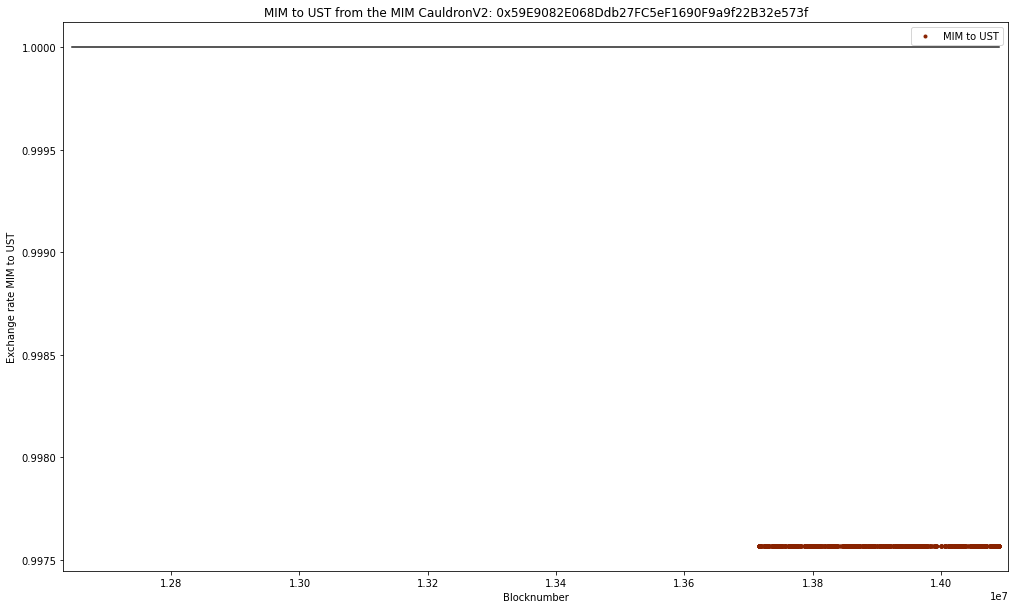

In [125]:
# plt.plot(uni_mim_usdc_df.blocknumber, uni_mim_usdc_df.MIM_to_USDC)
plt.plot(mim_usdc_cauldron_df.blocknumber, mim_usdc_cauldron_df.exchangerate, color='#820', marker='.', linestyle='')
plt.plot([minbn, maxbn], [1,1], linestyle='-', color="#222")
ax = plt.gca()
ax.set(title="MIM to UST from the MIM CauldronV2: " + MIM_UST_Cauldron_address,
       xlabel="Blocknumber",
       ylabel="Exchange rate MIM to UST")
ax.set_xlim([minbn - (1/100)*(delbn), maxbn + (1/100)*(delbn)])
fg = plt.gcf()
fg.tight_layout()
fg.set_size_inches(16,10)
ax.legend(labels=["MIM to UST"])
plt.savefig('../img/MIM_to_UST_CauldronV2.png', format='png')
plt.show()